## Midterm exam - DTSC 2301

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
import random
import warnings

# initializing the libraries
warnings.filterwarnings("ignore")
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False).set_output(transform = 'pandas')
label_encoder = LabelEncoder()
sc = StandardScaler()
lin_reg = LinearRegression()


In [2]:
# Loading the dataset
diamonds_df = sns.load_dataset("diamonds")
print(diamonds_df.tail())

       carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64


In [3]:
# Dividing the dataset into X and Y
X = diamonds_df.drop(['price'], axis = 1)
Y = diamonds_df[["price"]]
print(X.head())
print(Y.head())

   carat      cut color clarity  depth  table     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75
   price
0    326
1    326
2    327
3    334
4    335


In [4]:
# Converting categorical data to numerical
numericalX = X.drop(['cut', 'color', 'clarity'], axis = 1)
print(numericalX.head())

   carat  depth  table     x     y     z
0   0.23   61.5   55.0  3.95  3.98  2.43
1   0.21   59.8   61.0  3.89  3.84  2.31
2   0.23   56.9   65.0  4.05  4.07  2.31
3   0.29   62.4   58.0  4.20  4.23  2.63
4   0.31   63.3   58.0  4.34  4.35  2.75


In [5]:
# Filtering catergorical data
categoricalX = X.filter(["cut", "color", "clarity"])
print(categoricalX.head())

       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2


In [6]:
# Transforming categorical data to numerical
catnum = encoder.fit_transform(categoricalX)
catcolumns = encoder.get_feature_names_out(input_features = categoricalX.columns)
print(catnum.head())

   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_D  \
0       0.0       0.0        1.0          0.0            0.0      0.0   
1       0.0       0.0        0.0          1.0            0.0      0.0   
2       0.0       1.0        0.0          0.0            0.0      0.0   
3       0.0       0.0        0.0          1.0            0.0      0.0   
4       0.0       1.0        0.0          0.0            0.0      0.0   

   color_E  color_F  color_G  color_H  color_I  color_J  clarity_I1  \
0      1.0      0.0      0.0      0.0      0.0      0.0         0.0   
1      1.0      0.0      0.0      0.0      0.0      0.0         0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0         0.0   
3      0.0      0.0      0.0      0.0      1.0      0.0         0.0   
4      0.0      0.0      0.0      0.0      0.0      1.0         0.0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0         0.0          0.0          1.0          0.0          0.0

In [7]:
# Concatenating numerical and categorical data
X = pd.concat([numericalX, catnum], axis = 1)
print(X.head())

   carat  depth  table     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0  3.95  3.98  2.43       0.0       0.0        1.0   
1   0.21   59.8   61.0  3.89  3.84  2.31       0.0       0.0        0.0   
2   0.23   56.9   65.0  4.05  4.07  2.31       0.0       1.0        0.0   
3   0.29   62.4   58.0  4.20  4.23  2.63       0.0       0.0        0.0   
4   0.31   63.3   58.0  4.34  4.35  2.75       0.0       1.0        0.0   

   cut_Premium  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0          0.0  ...      0.0      0.0         0.0         0.0          0.0   
1          1.0  ...      0.0      0.0         0.0         0.0          1.0   
2          0.0  ...      0.0      0.0         0.0         0.0          0.0   
3          1.0  ...      1.0      0.0         0.0         0.0          0.0   
4          0.0  ...      0.0      1.0         0.0         0.0          0.0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0        

In [8]:
# Creating and Transforming test variables to match model variables

# For clarity test, we will randomly select a value
clarity_df = ["I1", "IF", "SI1", "SI2", "VS1", "VS2", "VVS1", "VVS2"]
random_clarity = random.choice(clarity_df)

test_df = {
    "Carat": [0.25],
    "depth": [56.7],
    "table": [57.0],
    "x": [4.01],
    "y": [4.05],
    "z": [2.35],
    "cut": ["Premium"], 
    "color": ["J"], 
    "clarity": [random_clarity]
}
test_df = pd.DataFrame.from_dict(test_df)

testcat = test_df.filter(["cut", "color", "clarity"])
test_df = test_df.drop(['cut', 'color', 'clarity'], axis = 1)

print(test_df)

   Carat  depth  table     x     y     z
0   0.25   56.7   57.0  4.01  4.05  2.35


In [9]:
# Transforming test categorical data to numerical
testcatnum = encoder.transform(testcat)
testcatcolumns = encoder.get_feature_names_out(input_features = testcat.columns)
print(testcatnum)

   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_D  \
0       0.0       0.0        0.0          1.0            0.0      0.0   

   color_E  color_F  color_G  color_H  color_I  color_J  clarity_I1  \
0      0.0      0.0      0.0      0.0      0.0      1.0         0.0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0         0.0          0.0          0.0          0.0          0.0   

   clarity_VVS1  clarity_VVS2  
0           0.0           1.0  


In [10]:
# Concatenating test numerical and test categorical data
test_df = pd.concat([test_df, testcatnum], axis = 1)
test_df

,Carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.25,56.7,57.0,4.01,4.05,2.35,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Splitting and scaling the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test = sc.fit_transform(test_df)


Models predicted values:  [[4905.42351431]
 [7586.98601431]
 [6142.42351431]
 ...
 [5274.61101431]
 [6976.33367056]
 [2300.1478365 ]]

Testing the models accuracy

Mean Absolute Error: 737.8420250155377
Mean Squared Error: 1248228.3643336506
Root Mean Squared Error: 1117.241408261281

Predicting our Diamonds value:  [[3933.6626529]]


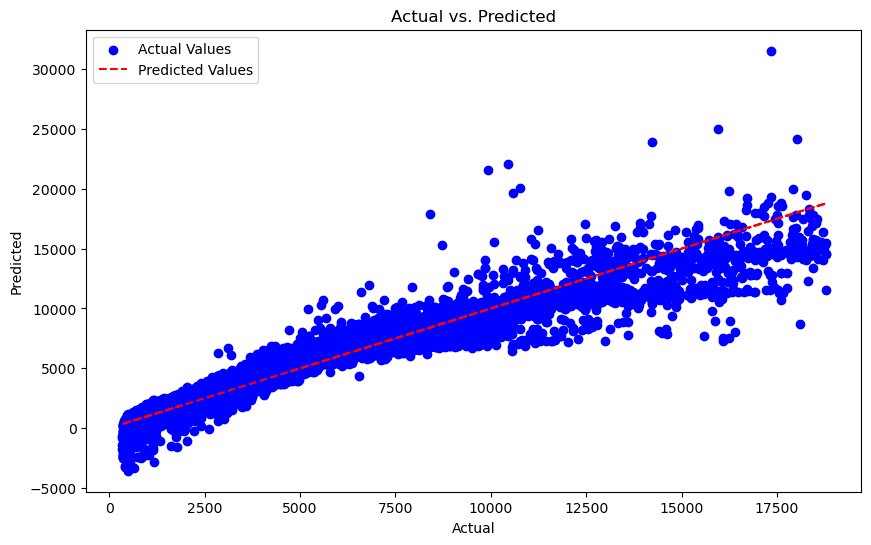

In [12]:
# Linear Regression
regressor = lin_reg.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print("Models predicted values: ", Y_pred)
print()

Y_predtest = regressor.predict(test)

# Testing the models accuracy
print("Testing the models accuracy")
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print()

# Predicting our Diamonds value
print("Predicting our Diamonds value: ", Y_predtest)

# Plotting actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Actual Values')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Predicted Values')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Models predicted values:  [[4589.6]
 [6278.2]
 [5180.8]
 ...
 [4082.6]
 [8588.8]
 [1579.6]]

Testing the models accuracy

Mean Absolute Error: 424.80530218761584
Mean Squared Error: 750683.68550241
Root Mean Squared Error: 866.420039878124

Our test values:  [[2537.]]


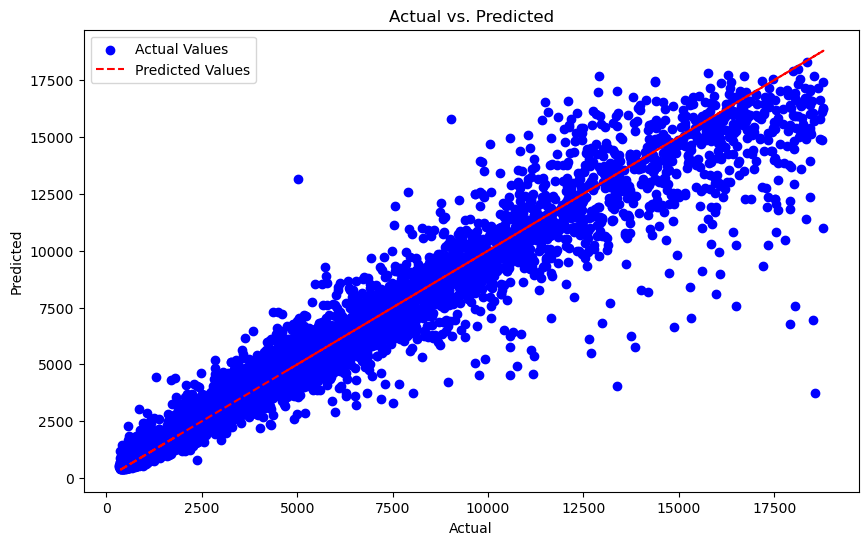

In [13]:
# KNN Regression

knn_reg = KNeighborsRegressor(n_neighbors=5)

regressor2 = knn_reg.fit(X_train, Y_train)
Y_pred2 = regressor2.predict(X_test)

print("Models predicted values: ", Y_pred2)
print()

Y_predtest2 = regressor2.predict(test)

# Testing the models accuracy
print("Testing the models accuracy")
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2)))
print()

print("Our test values: ", Y_predtest2)

# Plotting actual vs predicted for KNN
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred2, color='blue', label='Actual Values')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Predicted Values')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Models predicted values:  [4713.32 7191.16 5283.5  ... 4257.94 8833.3  2182.08]

Testing the models accuracy

Mean Absolute Error: 268.20877818975816
Mean Squared Error: 302989.43442157697
Root Mean Squared Error: 550.4447605542058

Our test values:  [3803.7]


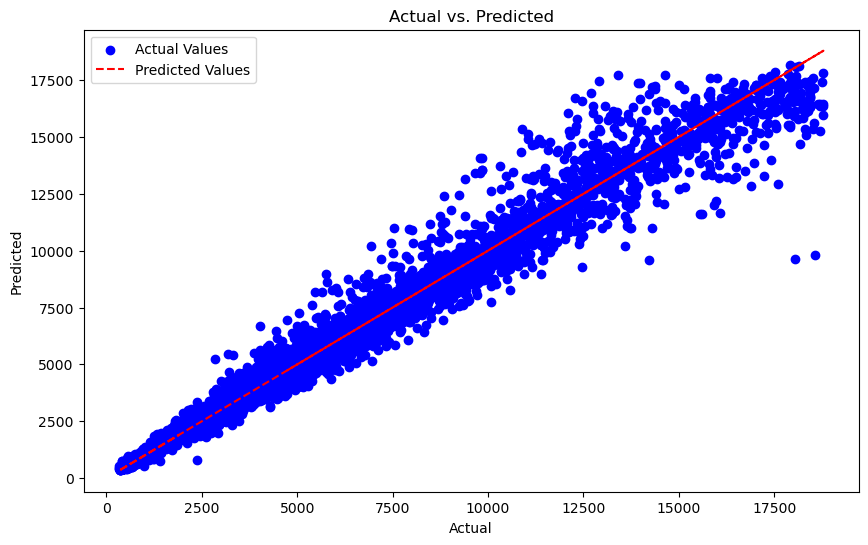

In [14]:
# Random Forest

rf_reg = RandomForestRegressor(random_state=10, n_estimators=50)

regressor3 = rf_reg.fit(X_train, Y_train)

Y_pred3 = regressor3.predict(X_test)
print("Models predicted values: ", Y_pred3)
print()

Y_predtest3 = regressor3.predict(test)

# Testing the models accuracy
print("Testing the models accuracy")
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred3)))
print()

print("Our test values: ", Y_predtest3)

# Plotting actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred3, color='blue', label='Actual Values')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Predicted Values')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()